#### This notebook and all necessary files to create these plots can be found on my github: https://github.com/tonygallen

# Plotting in Julia

### There are an intimidating amount of plotting packages

Luckily, we have Plots.jl.

Plots.jl is a plotting metapackage which brings many different plotting packages under a single API, making it easy to swap between plotting "backends".

They all have their pros and cons. You can explore some here:
#### https://docs.juliaplots.org/latest/backends
<img src="backend uses.png">


Today, we will focus on PyPlot.

Pros:

* Tons of functionality
* 2D and 3D
* Mature library
* Well supported in Plots.jl

Cons:

* Uses python
* Dependencies frequently cause setup issues
* Inconsistent output depending on Matplotlib version

### Installation

Unfortunately, you need not only Python but some of the SciPy ecosystem. You can simply install everything needed by installing Anaconda (https://conda.io/docs/user-guide/install/index.html).

To install the Plots package, in Julia simply type

In [ ]:
using Pkg
Pkg.add("Plots")

And of course you will need some backend, so type

In [ ]:
Pkg.add("PyPlot") # or Pkg.add("PlotlyJS"), for example

#some useful extensions you should add while your at it
#Pkg.add("StatPlots")
#Pkg.add("PlotRecipes")

In [1]:
## Now we are ready to get started!
using Plots

f = Plot{Plots.GRBackend() n=1}


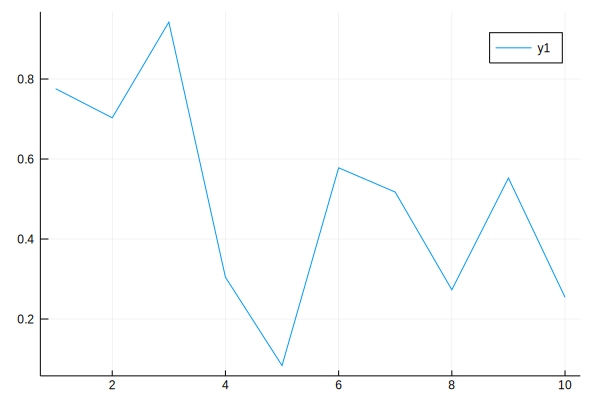

In [2]:
## Lets jump right in
data = rand(10)
f = plot(data)
@show f

We didn't specify a backend! Mine defaulted to GR.
Let's tell it to use pyplot.

f = Plot{Plots.PyPlotBackend() n=1}


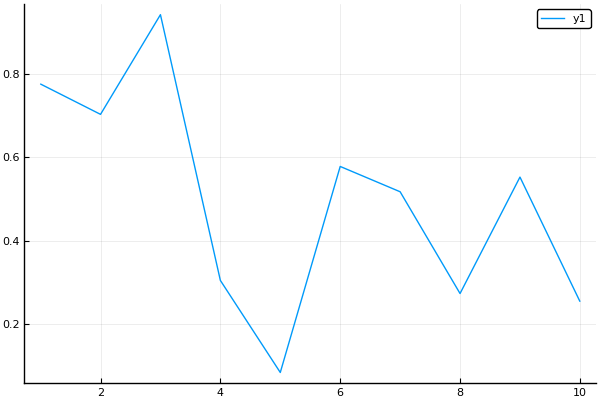

In [3]:
Plots.pyplot()
f = plot(data);
@show f

You can add more than 1 graph to the same plot:

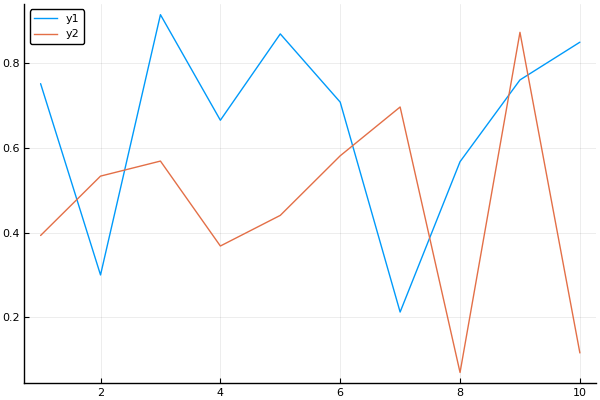

In [4]:
# In Plots.jl, every column is a 'series'
data2 = rand(10, 2); # 10x2 random mat
plot(data2)

# not necessary to use a variable f = ...

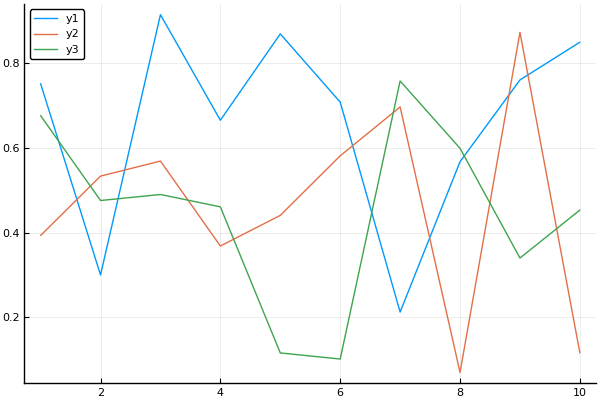

In [5]:
# You can also add to the most recent plot using plot!()
plot!(rand(10))

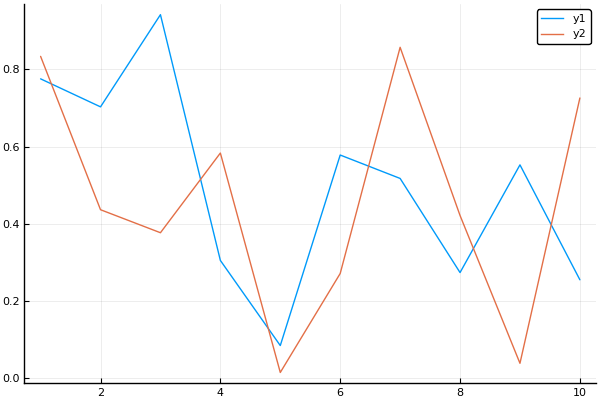

In [6]:
# or add to a specific plot
plot!(f,rand(10))

### Attributes

##### aka how to make your graph pretty

Julia calls things like color, line width, etc. 'Attributes'. 

In general, these are set by keyword arguements.

i.e. plot(data, keyword=value)

For a long list of Attributes, check out: http://docs.juliaplots.org/latest/attributes/

And check http://docs.juliaplots.org/latest/supported/ to see if your backend supports those Attributes



#### Lets Play around with some Attributes

First: linestyle, color, and markershape

In [7]:
# tip: use Plots.supported_styles() or Plots.supported_markers() to see which linestyles or markershapes you can use
@show Plots.supported_styles();
@show Plots.supported_markers();

Plots.supported_styles() = Symbol[:auto, :solid, :dash, :dot, :dashdot]
Plots.supported_markers() = Symbol[:none, :auto, :circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x, :pixel]


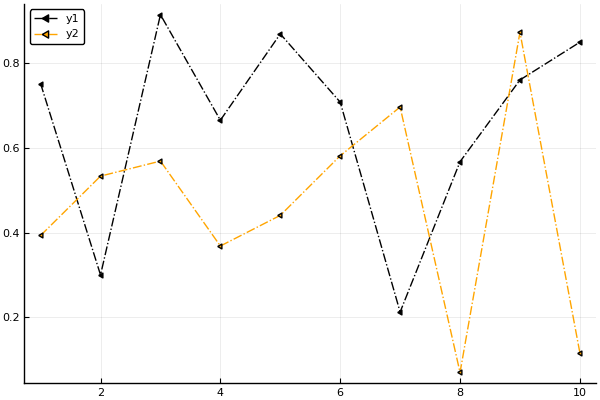

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [8]:
plot(data2, markershape = :ltriangle, linestyle = :dashdot, color = [:black :orange])

This is a prime example of matplotlib dependencies raising errors

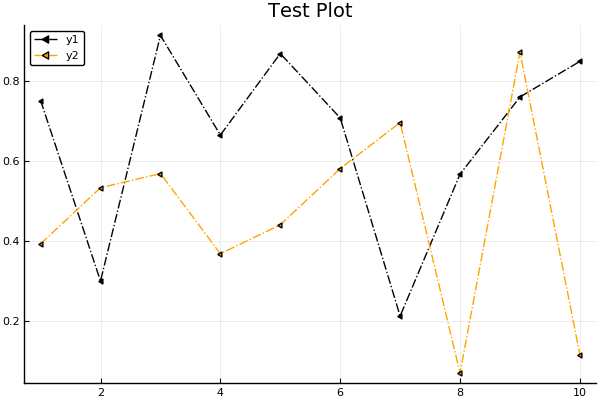

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [9]:
# You can use ! to update the last plot with certain Attributes

plot!(title="Test Plot")

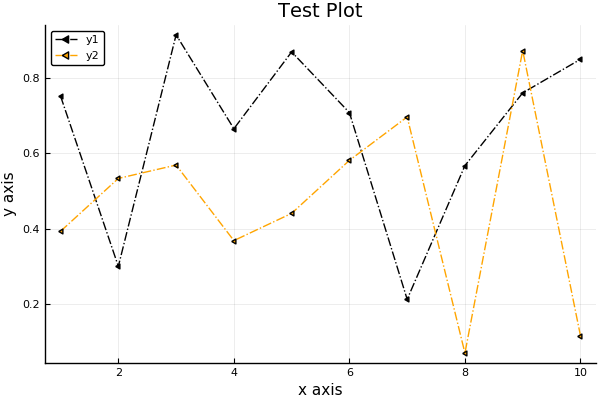

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [10]:
# Certain attributes have their own modifier function (!) too

plot!(ylabel = "y axis")
xlabel!("x axis")

#same result

There are also these 'magic' attributes (e.g. axis, xaxis, marker, line) where you can pass multiple sub-attributes at once.

You don't even have to label your sub-attributes. Julia does some type-checking magic to figure out which value applies to which argument.

###### Lets test this out

In [11]:
# lets use new data

data3 = hcat(Array(0:0.01:1),Array(1:-0.01:0)) #concatenate along dimension 2
data3 += .05*randn(size(data3)) # lets add randomness so its not so boring

101×2 Array{Float64,2}:
 0.0265667   0.991724 
 0.0933707   1.07117  
 0.0415541   1.0346   
 0.101022    1.05393  
 0.124824    0.959763 
 0.0710637   0.889158 
 0.086548    0.920414 
 0.0215248   0.989714 
 0.0374153   0.95194  
 0.0678798   0.906038 
 0.131726    0.938583 
 0.0702449   0.885036 
 0.170403    0.904721 
 ⋮                    
 0.844436    0.124202 
 0.977635    0.0991429
 0.868893    0.0453534
 0.917798    0.102463 
 0.876271    0.0552505
 0.831023   -0.0216485
 0.961214    0.021448 
 0.990352    0.110152 
 0.97341     0.0798246
 0.915008   -0.0314549
 1.02283     0.0537127
 0.972636    0.0846006

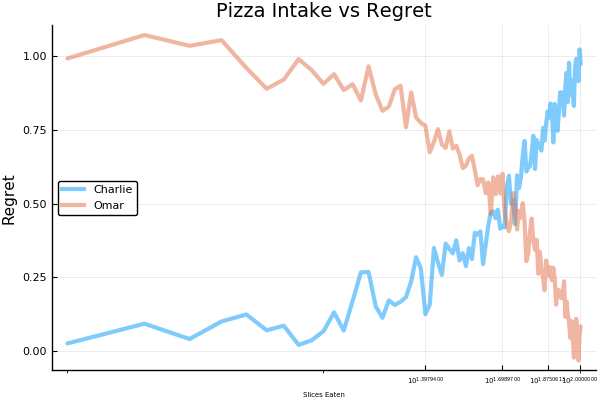

In [12]:
plot(data3, title="Pizza Intake vs Regret", xaxis = (font(5), "Slices Eaten", 0:25:101, :log10), 
     ylabel="Regret",line=(0.5, 3), label=["Charlie" "Omar"])

## Each attribute in xaxis = (font(32), "Slices Eaten", 0:25:101, :log10) has its own name.
## We could've assigned their values seperately, e.g. 
## xtickfont = font(32), xlabel = "Slices Eaten", ...

## same with line=(0.5, 3)

### To make all of these changes by hand (clicking your mouse), use gui()

doesn't work on Jupyter

In [13]:
gui()

C:\Users\Tony\.julia\conda\3\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


## Input arguments take many forms
Choose your favorite:

In [ ]:
plot()                                    # empty Plot object
plot(4)                                   # initialize with 4 empty series
plot(rand(10))                            # 1 series... x = 1:10    <--------------------- we've used this
plot(rand(10,5))                          # 5 series... x = 1:10    <--------------------- and this
plot(rand(10), rand(10))                  # 1 series
plot(rand(10,5), rand(10))                # 5 series... y is the same for all
plot(sin, rand(10))                       # y = sin(x)
plot(rand(10), sin)                       # same... y = sin(x)
plot([sin,cos], 0:0.1:π)                  # 2 series, sin(x) and cos(x)
plot([sin,cos], 0, π)                     # sin and cos on the range [0, π]

In [14]:
# you can pass in generic functions like:
sin

sin (generic function with 12 methods)

###### Does order of inputs matter?
Well, sometimes


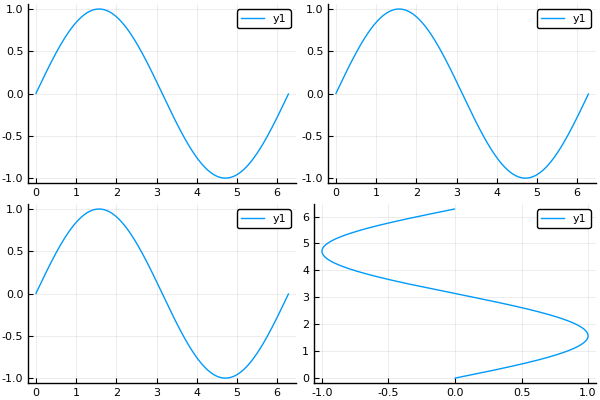

In [15]:
p1 = plot(sin, 0:0.01:2*pi)
p2 = plot(0:0.01:2*pi, sin)

x = Array(0:0.01:2*pi);
y = sin.(x); # elementwise sin(x)

p3 = plot(x,y)
p4 = plot(y,x)


plot(p1,p2,p3,p4)

# layout is:
# p1 p2
# p3 p4

##### Layout
The above plot defaulted to a 2x2 grid.


We can change this using the argument: layout = (4,1)

You can also add attributes as you did previously

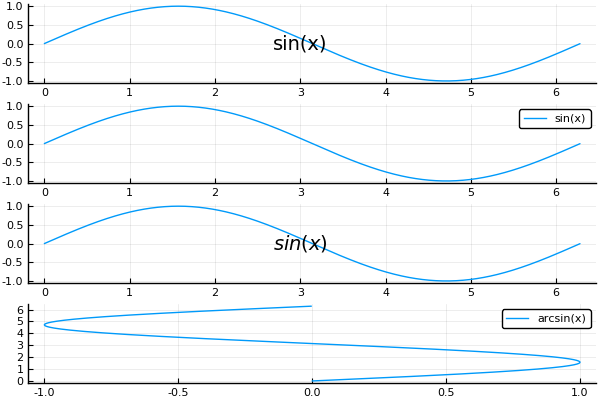

In [16]:
using LaTeXStrings

plot(p1,p2,p3,p4, layout = (4,1), 
     legend=[false true false true], 
     label = ["" "sin(x)" "" "arcsin(x)"], # using "" skips over that plot. 
     annotate = [(3,0,"sin(x)") (0,0,"") (3,0,text(L"sin(x)")) (0,0,"")]) # L"" uses LaTeX to construct string

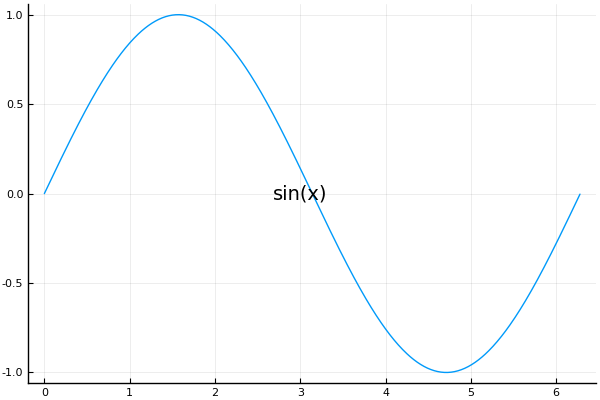

In [17]:
#Note: changing the attributes like this changes the original plots!
p1

#### Images
(a reason to show off my dogs)

In [18]:
using Images #may need to Pkg.add("Images")
img1 = load("dog.jpg");
img2 = load("dog2.jpg");
img3 = load("dog3.png");

┌ Info: Recompiling stale cache file C:\Users\Tony\.julia\compiled\v1.0\Images\H8Vxc.ji for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file C:\Users\Tony\.julia\compiled\v1.0\ImageMagick\0LbNX.ji for ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1184


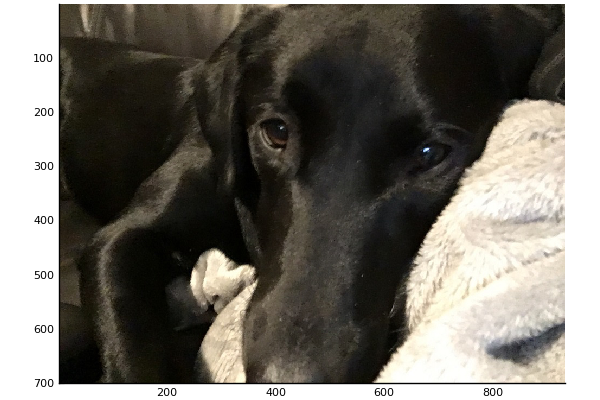

In [19]:
plot(img1) # Anna

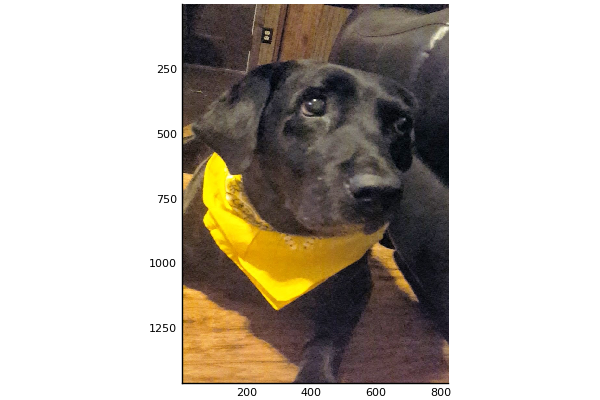

In [20]:
plot(img2, aspect_ratio=.8) # Gracie

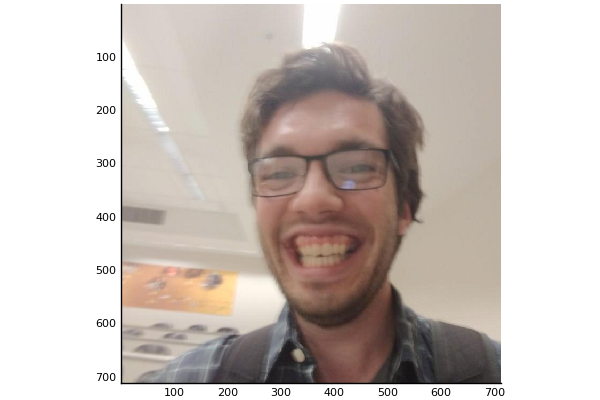

In [21]:
plot(img3) # Charlie

## All of this has been with the plot() function!
#### There are many more and they all of their own attributes, but the strategy is all the same

Here a few examples of the things you can do

#### Histograms

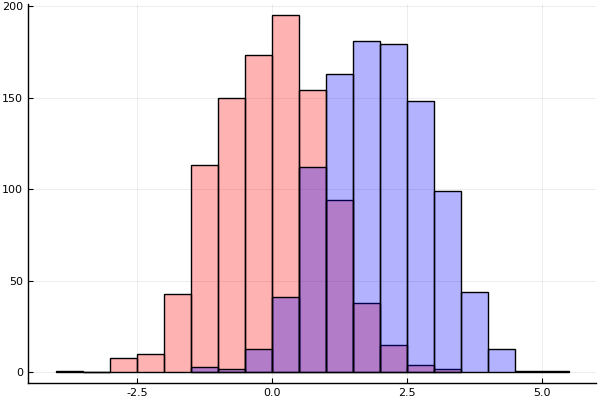

In [22]:
data4 = randn(1000) #normally distributed
data5=2*ones(1000)+randn(1000)
histogram(data4, nbins=20, color=:red, fillalpha=.3)
histogram!(data5, nbins=20, color=:blue, fillalpha=.3,legend=false)



#### 2D Histrograms

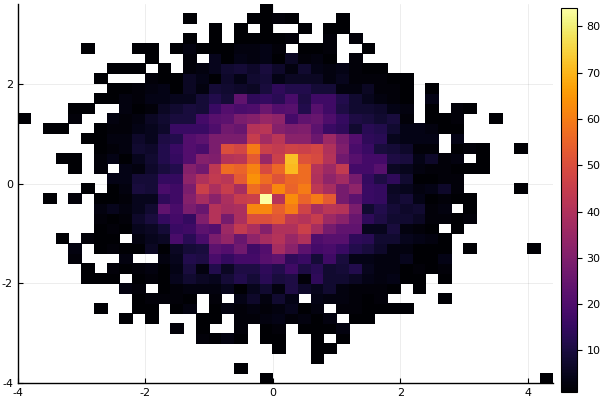

In [23]:
Plots.pyplot() # back to pyplot
histogram2d(randn(10000), randn(10000), nbins=50)

#### Scatter Plots

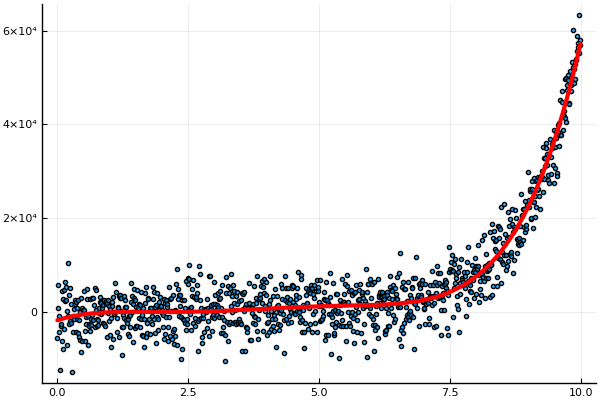

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [24]:
x = Array(0:0.01:9.99)
y = exp.(ones(1000)+x) + 4000*randn(1000)
scatter(x,y,markersize=3,alpha=.8,legend=false)

# lets fit a degree 5 polynomial
A = [ones(1000) x x.^2 x.^3 x.^4 x.^5]
c = A\y
f = c[1]*ones(1000) + c[2]*x + c[3]*x.^2 + c[4]*x.^3 + c[5]*x.^4 + c[6]*x.^5
plot!(x,f,linewidth=3, color=:red)

#### Polar Coordinates

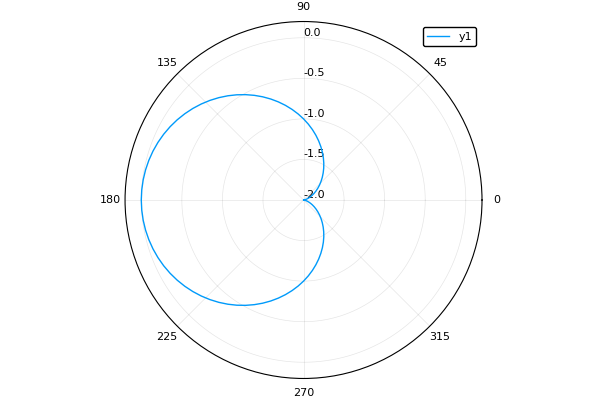

In [25]:
theta = 0:2*pi/100:2*pi+2*pi/100
r=-(cos.(theta).+1)

plot(theta,r, proj=:polar) # <3

#### Pie Charts

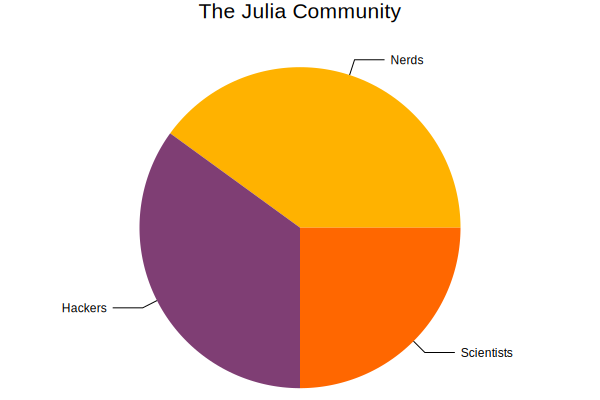

In [26]:
Plots.gr() # I prefer the default GR backend look for pie charts
x = ["Nerds", "Hackers", "Scientists"]
y = [0.4, 0.35, 0.25]
pie(x, y, title="The Julia Community", l=0.5)

#taken from http://docs.juliaplots.org/latest/examples/pyplot/

#### Contours

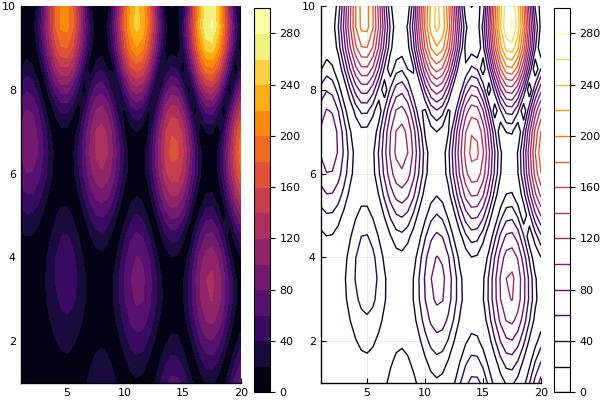

C:\Users\Tony\.julia\conda\3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)


In [35]:
Plots.pyplot() # back to pyplot
x = 1:0.5:20
y = 1:0.5:10
g(x, y) = begin
        (3x + y ^ 2) * abs(sin(x) + cos(y))
    end
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = map(g, X, Y)
p1 = contour(x, y, g, fill=true)
p2 = contour(x, y, Z)
plot(p1, p2)

# taken from http://docs.juliaplots.org/latest/examples/pyplot/

#### Heat maps

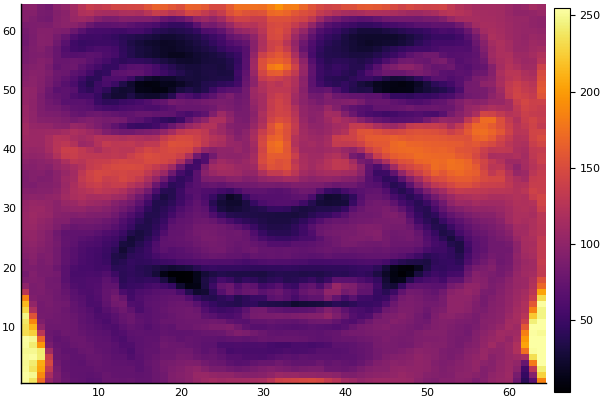

In [36]:
# from Yale's face database http://www.cad.zju.edu.cn/home/dengcai/Data/FaceData.html

using DelimitedFiles
A = readdlm("Yale_64.csv",',')
B = reshape(A'[:,49], 64,64)


heatmap(B[end:-1:1,end:-1:1])


#### Plot3D

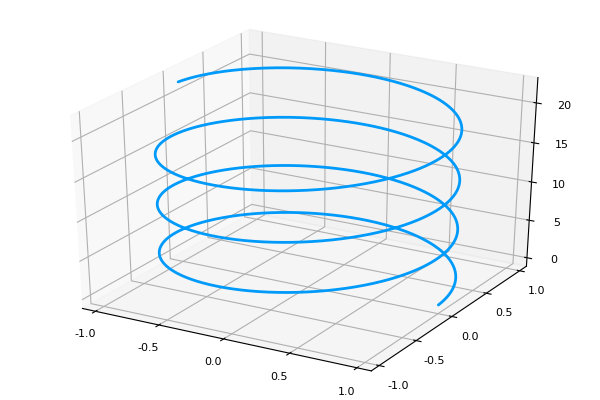

In [37]:
t=0:pi/200:7*pi
x=cos.(t)
y=sin.(t)

plot3d(x,y,t,lw=2,leg=false)

#### Surface

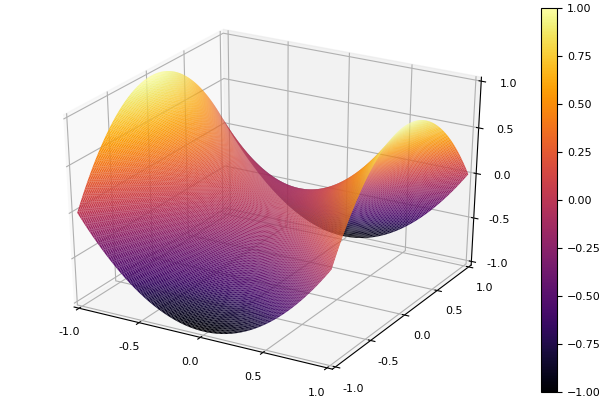

In [38]:
x=-1:0.01:1
y=-1:0.01:1
h(x,y)=x^2-y^2;

surface(x,y,h)

#### Wireframe

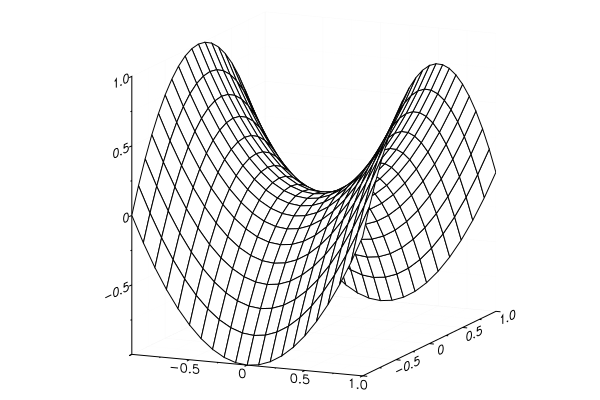

In [39]:
Plots.gr() # wireframe not working with pyplot atm (https://github.com/JuliaPlots/Plots.jl/issues/1830)

x=-1:0.1:1
y=-1:0.1:1
h(x,y)=x^2-y^2;

wireframe(x,y,h)

#### And more!

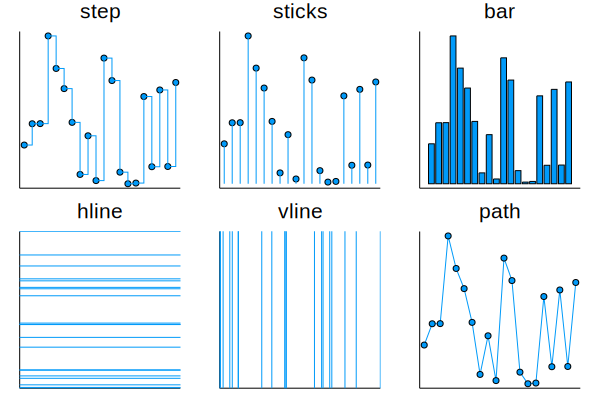

In [40]:
seriestypes = [:step, :sticks, :bar, :hline, :vline, :path]
titles =["step" "sticks" "bar" "hline" "vline" "path"]
plot(rand(20,1), st = seriestypes, layout = (2,3),ticks=nothing, legend=false, title=titles,m=3,c=[1])

# and I'm sure that is not all of them

# Let's have some fun! 

### Animations

Making animations with Plots.jl is made simple by the @gif and @animate macros.

The main difference is @animate returns an 'Animation' object for later processing, while @gif creates the animation immediately for viewing.

(note: I had some troubles getting @gif and gif() to work. You may need to install ffmpeg (https://ffmpeg.zeranoe.com/builds/) and add it to your PATH. Theres a lot of Issues on the Plots.jl github helped me get it working!) 

How to use:

In [ ]:
## @gif or @animate macro should be followed by some sort of iteration

anim = @animate for i=1:100 # this will create 100 frames
    plot(...) # each frame is given by the plot
end

# each frame has been (temporarily) saved

# to create a gif:
gif(anim, fps = 15) # setting fps is optional

In [ ]:
# some more options
anim= @animate for i=1:100
    plot(...)
end every 10 # will save every 10th iteration

gif(anim)

In [ ]:
@gif for i=1:100
    plot(...)
end when i > 50 && mod1(i, 10) == 5

#### Example(s)

In [43]:
## Hypocycloid 

## Lets recreate the gif on the Wiki (https://en.wikipedia.org/wiki/Hypocycloid)

r = 1
k = 3
n = 100

th = Array(0:2*pi/100:2*pi+2*pi/100) # theta from 0 to 2pi ( + a little extra)
X = r*k*cos.(th)
Y = r*k*sin.(th)


anim = @animate for i in 1:n
    
    # initialize plot with 4 series
    plt=plot(5,xlim=(-4,4),ylim=(-4,4), c=:red, aspect_ratio=1,legend=false, framestyle=:origin)
    
    # big circle
    plot!(plt, X,Y, c=:blue, legend=false)
    
    t = th[1:i]
    
    # the hypocycloid
    x = r*(k-1)*cos.(t) + r*cos.((k-1)*t)
    y = r*(k-1)*sin.(t) - r*sin.((k-1)*t)
    plot!(x,y, c=:red) 
    
    # the small circle
    xc = r*(k-1)*cos(t[end]) .+ r*cos.(th)
    yc = r*(k-1)*sin(t[end]) .+ r*sin.(th)
    plot!(xc,yc,c=:black)
    
    # line segment
    xl = transpose([r*(k-1)*cos(t[end]) x[end]])
    yl = transpose([r*(k-1)*sin(t[end]) y[end]])
    plot!(xl,yl,markershape=:circle,markersize=4,c=:black)
    scatter!([x[end]],[y[end]],c=:red, markerstrokecolor=:red)
    

end

Animation("C:\\Users\\Tony\\AppData\\Local\\Temp\\jl_23B1.tmp", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000091.png", "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png"])

In [45]:
gif(anim)

┌ Info: Saved animation to 
│   fn = C:\Users\Tony\Desktop\Google Drive\JPUG\tmp.gif
└ @ Plots C:\Users\Tony\.julia\packages\Plots\rmogG\src\animation.jl:90


Plots.AnimatedGif("C:\\Users\\Tony\\Desktop\\Google Drive\\JPUG\\tmp.gif")



## Resources

Plots.jl Documentation (http://docs.juliaplots.org/latest/)

PyPlot Github (https://github.com/JuliaPy/PyPlot.jl)

Lecture on Plotting in Julia (https://lectures.quantecon.org/jl/julia_plots.html)

Huda's Plotting Tutorial (https://github.com/nassarhuda/JuliaTutorials/blob/master/plotting.ipynb)
